In [24]:
import pandas as pd
import numpy as np 
import re  
import json
import seaborn as sns
import matplotlib.pyplot as plt 
import calendar
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [25]:
df_usvideos = pd.read_csv('data/youtube/USvideos.csv')
json_cats = pd.read_json('data/youtube/US_category_id.json')
df_cats = pd.json_normalize(json_cats['items'])

In [26]:
#df_cats.info() 
#df_usvideos.info() 

In [27]:
df_cats=df_cats.iloc[:,2:]
#df_usvideos['trending_date'] = df_usvideos['trending_date'].apply(lambda x: re.sub('\.','-',x))
df_cats['id']=df_cats['id'].astype(int) 
cols=["views likes dislikes comment_count".split()]
for col in cols:
    df_usvideos[col]=df_usvideos[col].astype(int)

In [28]:
df = pd.merge(df_usvideos
              , df_cats
              , left_on=['category_id']
              , right_on=['id']
              , suffixes=['','┌∩┐(◣_◢)┌∩┐']
             )
df.drop(
    [c for c in df.columns if '┌∩┐(◣_◢)┌∩┐' in c]
    , axis=1
    , inplace=True
    )
df_youtube=df  

In [29]:
df_youtube=df[['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'id', 'snippet.channelId',
       'snippet.title']]

In [30]:
df=df_youtube 
dict_day_name=dict(enumerate(calendar.day_name))  
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['trending_date'] = pd.to_datetime(df['trending_date'],format="%y.%d.%m")
df["Trending_Year"]=df["trending_date"].apply(lambda t:t.year)
df["Trending_Month"]=df["trending_date"].apply(lambda t:t.month)
df["Trending_Day"]=df["trending_date"].apply(lambda t:t.day) 
df["Trending_Day_of_Week"]=df["trending_date"].apply(lambda t:t.dayofweek) 
df["Trending_DOW"]=df["Trending_Day_of_Week"].map(dict_day_name)
df["publish_Year"]=df["publish_time"].apply(lambda t:t.year)
df["publish_Month"]=df["publish_time"].apply(lambda t:t.month)
df["publish_Day"]=df["publish_time"].apply(lambda t:t.day)
df["publish_Day_of_Week"]=df["publish_time"].apply(lambda t:t.dayofweek)
df["publish_DOW"]=df["publish_Day_of_Week"].map(dict_day_name)
df["Publish_Hour"]=df["publish_time"].apply(lambda t:t.hour)  
df["title"]=df["title"].apply(lambda t: ''.join([c for c in t if (c.isalpha()) or (c.isspace())]))
df[2000:len(df):6000]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,Trending_Month,Trending_Day,Trending_Day_of_Week,Trending_DOW,publish_Year,publish_Month,publish_Day,publish_Day_of_Week,publish_DOW,Publish_Hour
2000,hlb3gGNBHFE,2018-03-19,THE DIFFERENCE BETWEEN AUSTRALIA NEW ZEALAND,How to DAD,22,2018-03-05 01:15:47+00:00,"australia|""ozzy""|""kiwi""|""new zealand""|""bathurs...",643097,23778,447,...,3,19,0,Monday,2018,3,5,0,Monday,1
8000,AP14dJZzKkA,2018-02-27,Woman Tries to Get a Free Ride,Ryan Is Driving,24,2018-02-22 21:10:45+00:00,"ryan is driving|""uber""|""rideshare""|""adventures...",2879538,108022,2773,...,2,27,1,Tuesday,2018,2,22,3,Thursday,21
14000,TU-Z4uPnFeg,2017-12-28,The Funeral Cyanide Happiness Shorts,ExplosmEntertainment,23,2017-12-21 06:00:00+00:00,"shorts|""c&hshorts""|""c&h shorts""|""c and h short...",1446140,64501,2171,...,12,28,3,Thursday,2017,12,21,3,Thursday,6
20000,dN1FTF3HF6c,2018-02-09,Rediscover the Love Big Mac Trio McDonalds,McDonald's,1,2018-02-05 01:43:07+00:00,"McDonald's|""McDonalds""|""McDs""|""McDonald's rest...",442731,117,47,...,2,9,4,Friday,2018,2,5,0,Monday,1
26000,tsM6kq-7nmw,2018-06-08,Does LeBron need a th title to pass Jordan as ...,Skip and Shannon: UNDISPUTED,17,2018-05-30 17:01:39+00:00,"fox|""fox sports""|""fs1""|""fox sports 1""|""undispu...",727615,6108,1880,...,6,8,4,Friday,2018,5,30,2,Wednesday,17
32000,l884wKofd54,2018-06-04,Enrique Iglesias MOVE TO MIAMI Official Video...,EnriqueIglesiasVEVO,10,2018-05-09 07:00:01+00:00,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",21612500,244341,11720,...,6,4,0,Monday,2018,5,9,2,Wednesday,7
38000,8vCn190ti9U,2018-04-15,DIY Japanese Foil Ball CHALLENGE Man Vs Balls,ThreadBanger,26,2018-04-08 00:55:43+00:00,"DIY|""threadbanger""|""Corinne Leigh""|""Rob Czar""|...",1772108,67674,5720,...,4,15,6,Sunday,2018,4,8,6,Sunday,0


In [31]:
df=df_youtube
df=df.groupby('video_id', as_index=False).count().sort_values(by='views', ascending=False)  
vids = df[0:100]['video_id']  
df=df_youtube
df=df[df['video_id']==vids.iloc[12]] 
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,Trending_Month,Trending_Day,Trending_Day_of_Week,Trending_DOW,publish_Year,publish_Month,publish_Day,publish_Day_of_Week,publish_DOW,Publish_Hour
20988,6S9c5nnDd_s,2018-05-16,Bohemian Rhapsody Teaser Trailer HD th Centu...,20th Century Fox,1,2018-05-15 13:01:12+00:00,"Trailer|""bohemian rhapsody""|""queen""|""freddie m...",4215671,161058,2198,...,5,16,2,Wednesday,2018,5,15,1,Tuesday,13
21000,6S9c5nnDd_s,2018-05-17,Bohemian Rhapsody Teaser Trailer HD th Centu...,20th Century Fox,1,2018-05-15 13:01:12+00:00,"Trailer|""bohemian rhapsody""|""queen""|""freddie m...",7641675,250546,4393,...,5,17,3,Thursday,2018,5,15,1,Tuesday,13


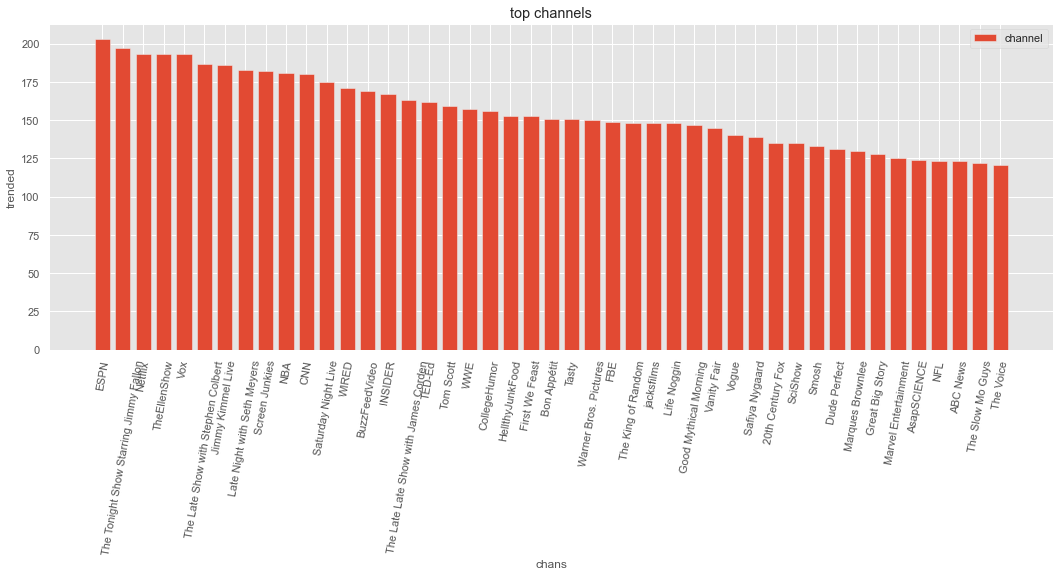

In [32]:
df=df_youtube   
df=df[['channel_title', 'views' ]].groupby(df['channel_title']).count() 
df=df[df['views'] > 120]
df.sort_values(by='views', inplace=True, ascending=False)
  
y1=df['views'] 
fig, (ax, ax1) = plt.subplots(2, figsize=(18,6))
ax = plt.subplot(111) 
ax.bar(y1.index, y1, width=.75 )  
ax.set(title='top channels', ylabel='trended', xlabel='chans')  
ax.legend(['channel'] , loc='best')   
plt.setp(ax.xaxis.get_majorticklabels(), rotation=80)
plt.show() 
df_topchannels=df

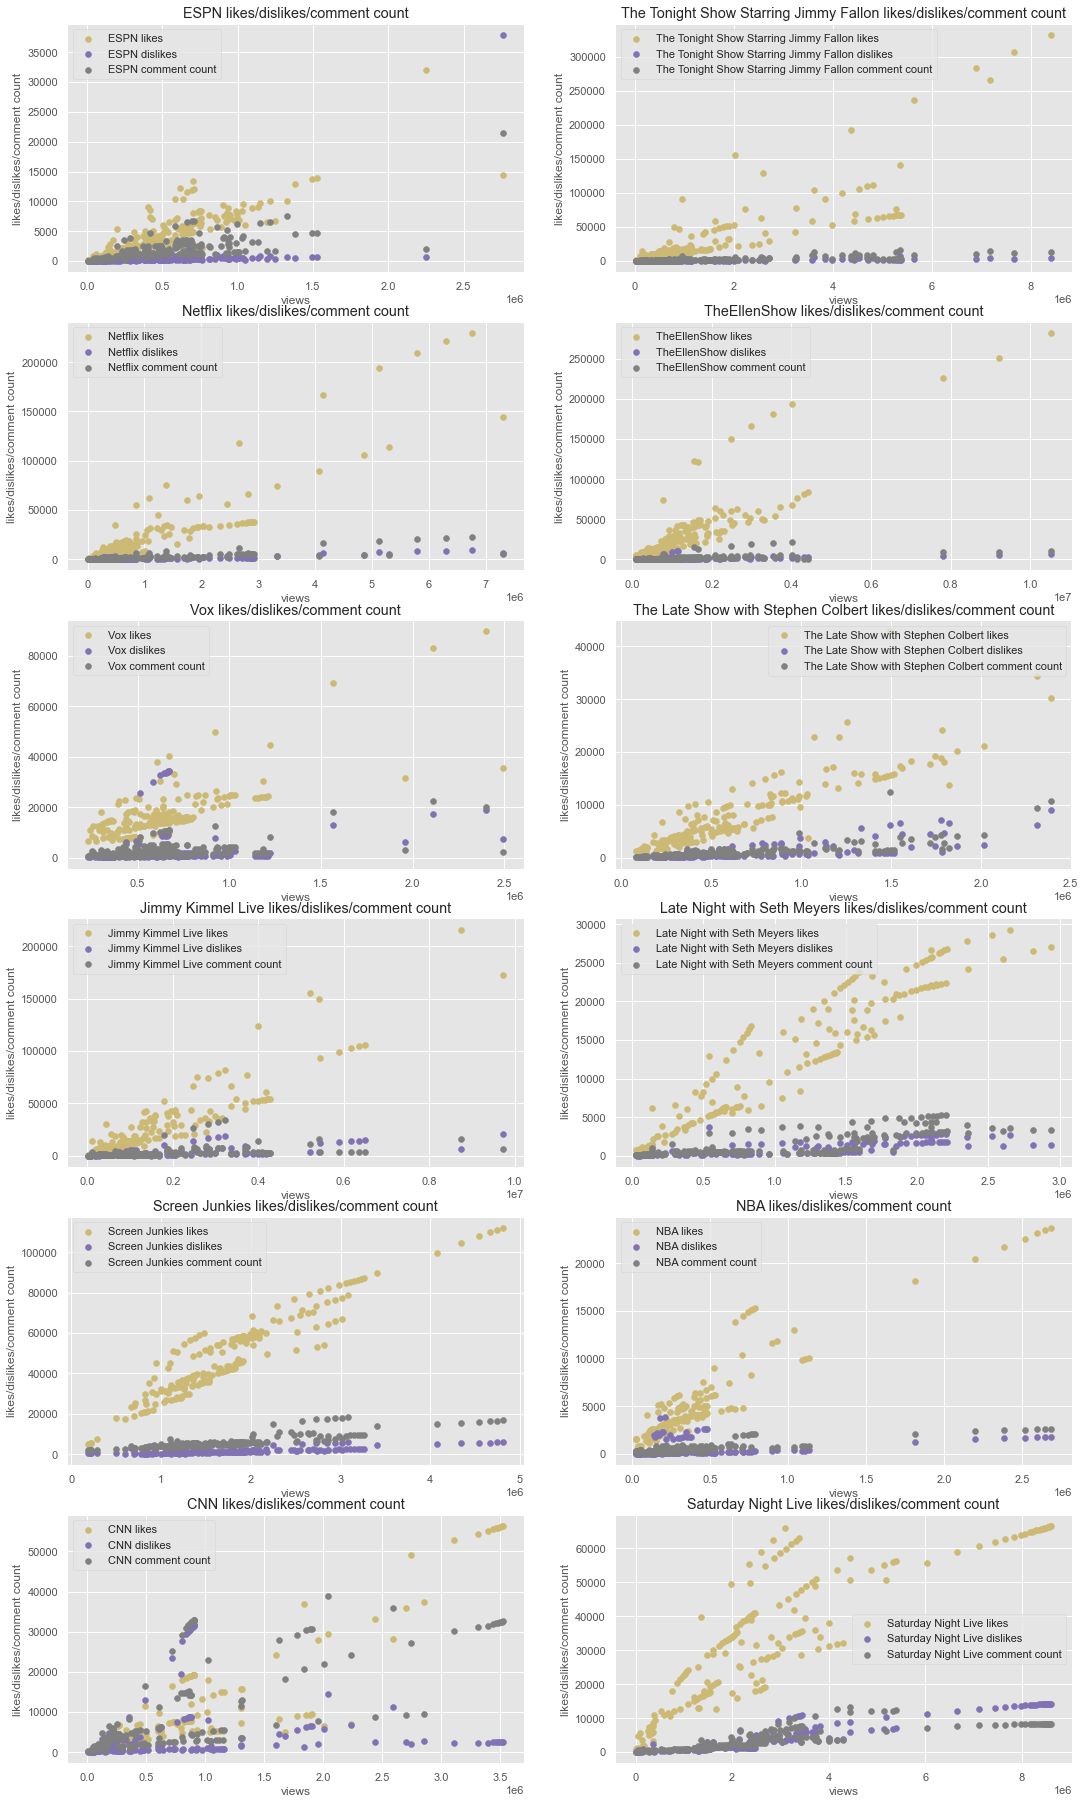

In [33]:
df=df_youtube
pindx = 0
fig,(ax) = plt.subplots(2, figsize=(18, 32)) 
channels = df_topchannels[:12].index 
rows=int((len(channels)+1)/2 ) 
for ch in channels: 
    df=df_youtube
    df=df[ (df['channel_title']  == ch) ]
    df=df[['channel_title', 'likes', 'dislikes', 'views', 'comment_count']].groupby(df['trending_date']).sum() 
    y=df['views']  
    pindx=pindx+1
    plt.style.use('ggplot')
    ax = plt.subplot(rows, 2, pindx) 
    ax.scatter( df['views'], df['likes'], color="y"  )   
    ax.scatter( df['views'], df['dislikes'], color="m" )  
    ax.scatter( df['views'], df['comment_count'], color="gray" )   
    ax.set(title=f'{ch} likes/dislikes/comment count', ylabel='likes/dislikes/comment count', xlabel='views')
    ax.legend([f'{ch} likes', f'{ch} dislikes', f'{ch} comment count'] , loc='best') 
plt.show()

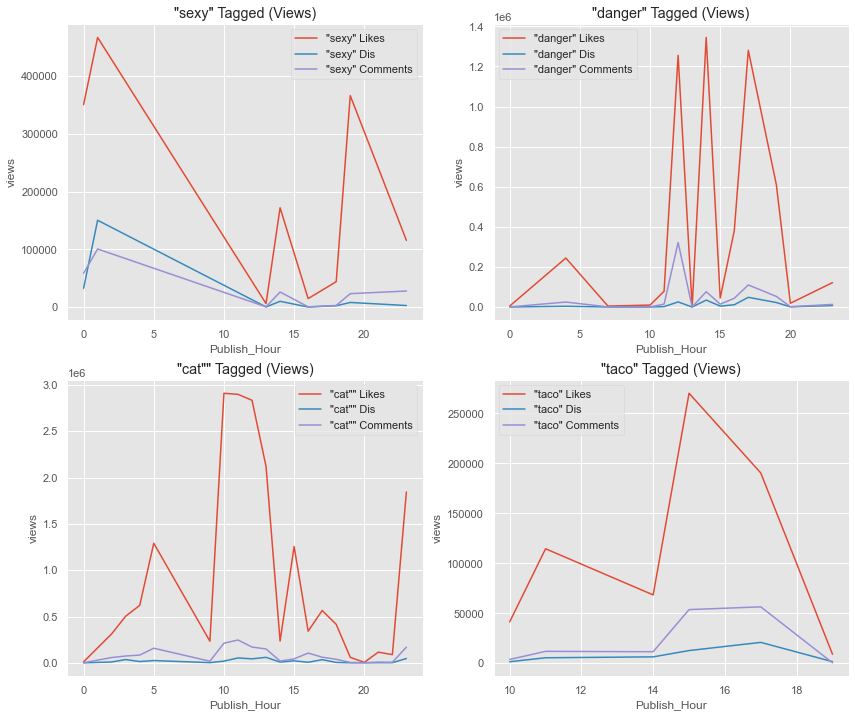

In [34]:
df=df_youtube
tags = ['sexy','danger','cat"','taco']
pindx = 0
fig,(ax) = plt.subplots(2, figsize=(14, 12))  
rows=int((len(tags)+1)/2 ) 
for tag in tags:
    df=df_youtube
    df=df.loc[df['tags'].str.contains(tag)]   
    df=df.groupby(df['Publish_Hour'] ).sum()  
    pindx=pindx+1
    ax = plt.subplot(rows, 2, pindx) 
    plt.style.use('ggplot')
    ax.plot(df.index, df['likes']  ) 
    ax.plot(df.index, df['dislikes']  ) 
    ax.plot(df.index, df['comment_count']  ) 
    ax.set(title=f'"{tag}" Tagged (Views)', ylabel='views', xlabel='Publish_Hour')
    ax.legend([ f'"{tag}" Likes'
               , f'"{tag}" Dis'
               , f'"{tag}" Comments'] , loc='best') 
 
plt.show()

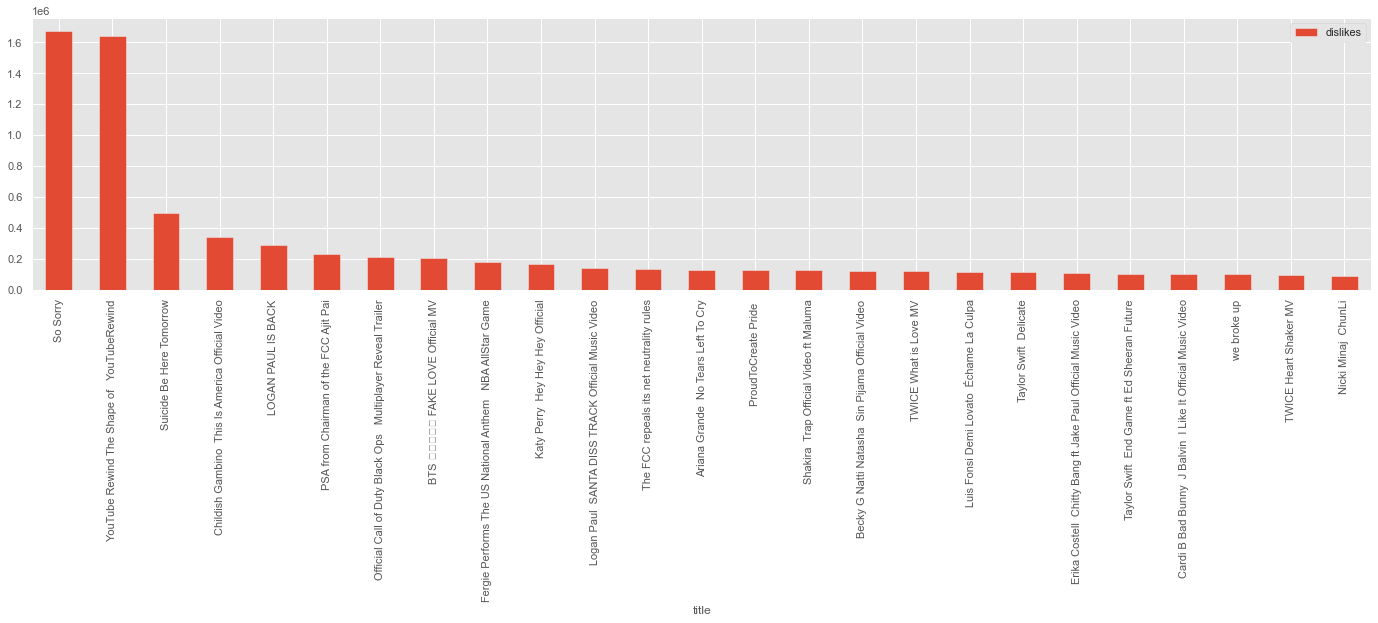

In [35]:
df=df_youtube
df=df[["title","dislikes"]]
df.drop_duplicates("title",keep="last",inplace=True)
df=df.sort_values("dislikes",ascending=False).head(25)
sns.set(rc={"figure.figsize":(24,5)})
plt.style.use('ggplot')
df.plot.bar(x="title", y="dislikes")

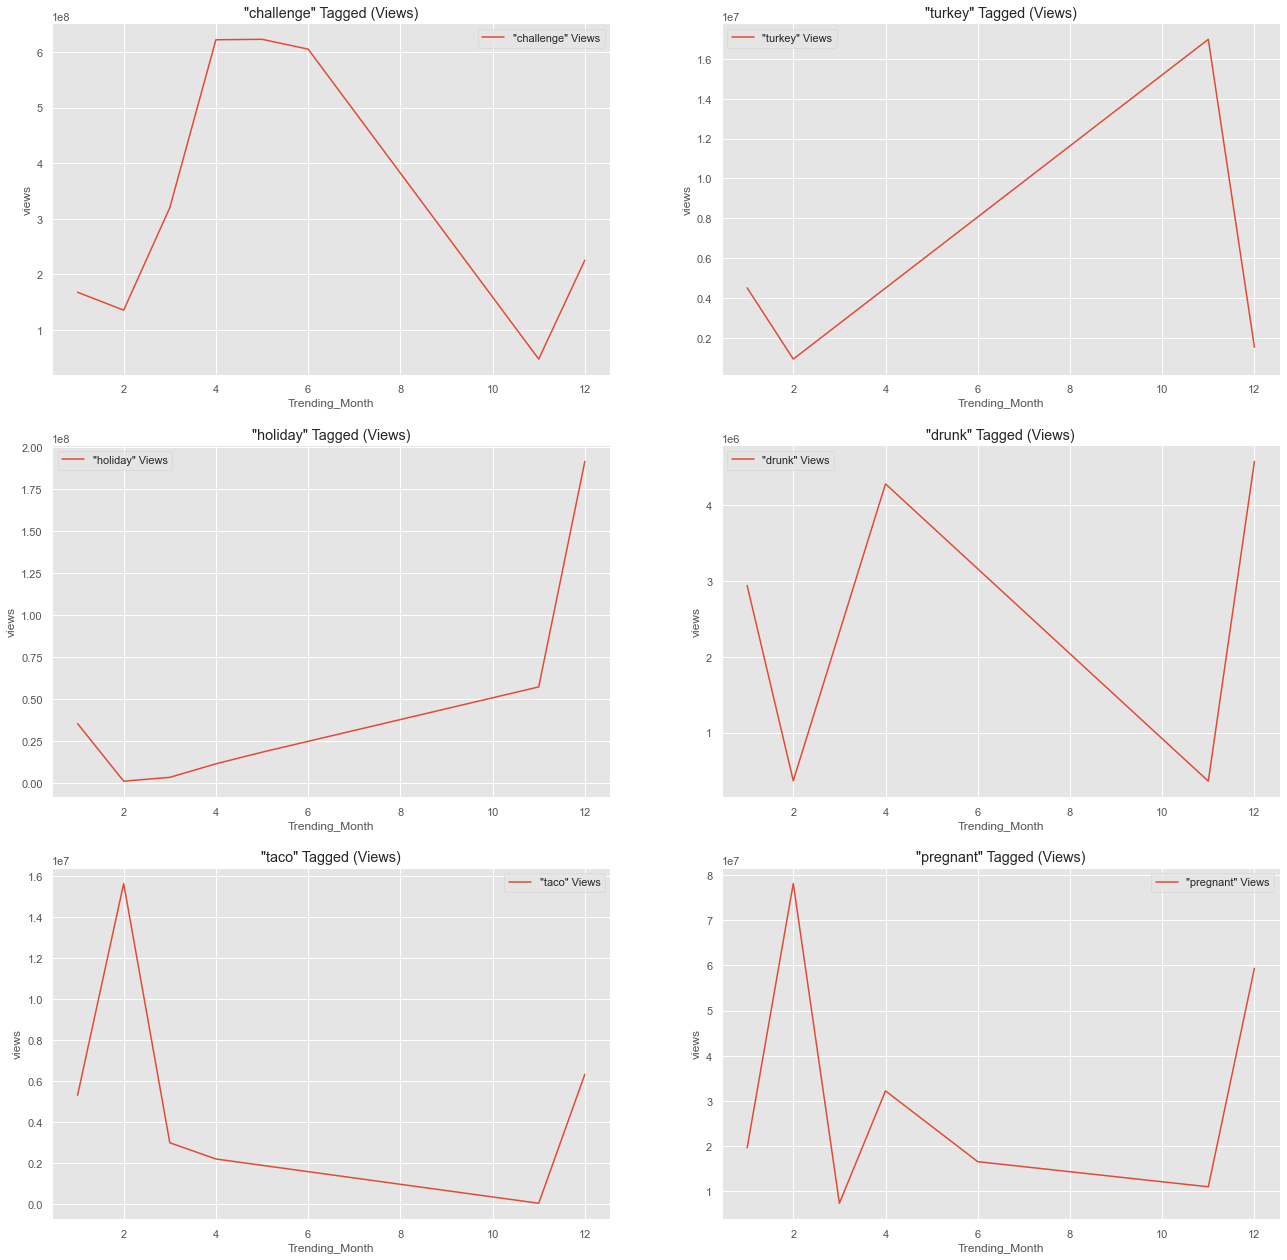

In [36]:
df=df_youtube
tags = ['challenge','turkey','holiday','drunk','taco','pregnant' ]
pindx = 0
fig,(ax) = plt.subplots(2, figsize=(22, 22))  
rows=int((len(tags)+1)/2 )  
for tag in tags:
    df=df_youtube
    df=df.loc[df['tags'].str.contains(tag)]   
    df=df.groupby(df['Trending_Month']).sum()  
    pindx=pindx+1
    ax = plt.subplot(rows, 2, pindx)  
    ax.plot(df.index, df['views']  ) 
    ax.set(title=f'"{tag}" Tagged (Views)', ylabel='views', xlabel='Trending_Month')
    ax.legend([ f'"{tag}" Views' ] , loc='best') 
 
plt.show()

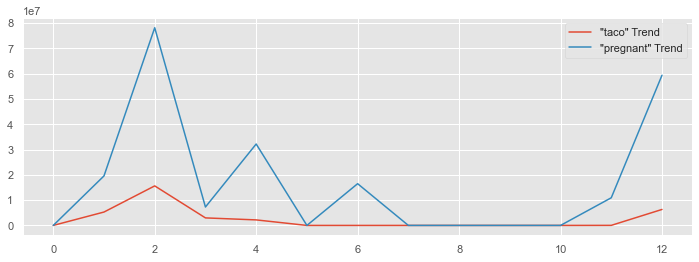

In [37]:
df=df_youtube
t1 = 'taco'
t2 = 'pregnant'
df_t1=df.loc[df['tags'].str.contains(t1)]  
df_t1=df_t1[['views']].groupby(df['Trending_Month'] ).sum()  
df_t2=df.loc[df['tags'].str.contains(t2)]  
df_t2=df_t2[['views']].groupby(df['Trending_Month'] ).sum()  
df_year = pd.DataFrame({'Trending_Month':range(13)} )
df_year = pd.merge(df_year , df_t1, left_on='Trending_Month', right_on='Trending_Month', how="left", suffixes=['','_x'] )
df_year = pd.merge(df_year , df_t2, left_on='Trending_Month', right_on='Trending_Month', how="left", suffixes=['','_y'] )
df_year.fillna(0, inplace=True)
#print(df_year)

fig,(ax) = plt.subplots(2, figsize=(12, 4))   
ax = plt.subplot(1,1, 1)  
ax.plot(df_year.index, df_year['views']  )   
ax.plot(df_year.index, df_year['views_y']  )   
ax.legend([ f'"{t1}" Trend', f'"{t2}" Trend' ] , loc='best') 
plt.show()


 


In [38]:
df=df_youtube
df=df.groupby('video_id', as_index=False).count().sort_values(by='views', ascending=False)  
vids = df[32:38]['video_id']   

Nicki Minaj  ChunLi Live on SNL   Music
Lucas the Spider  Giant Spider Film & Animation
Game of Zones  SE The Isle of Van Gundy Shows
SZA  Garden Say It Like Dat Official Video Music
Childish Gambino  This Is America Official Video Music
Just Like You Left It Comedy


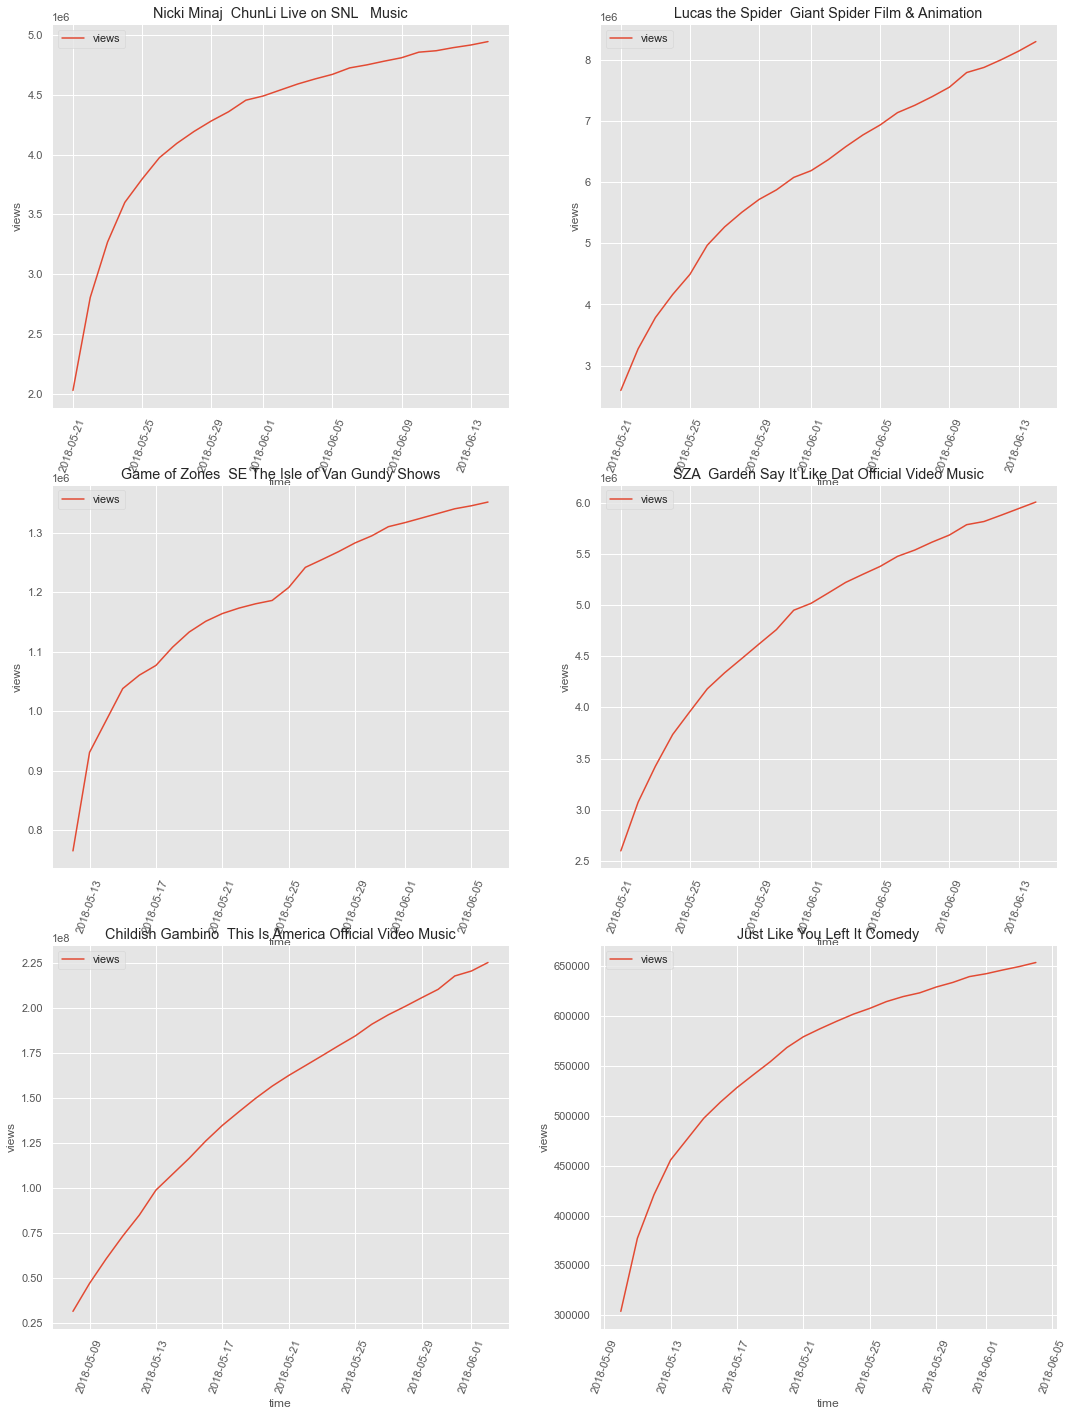

In [39]:
df=df_youtube 
pindx = 0
fig,(ax) = plt.subplots(2, figsize=(18, 24))  
rows=int((len(vids)+1)/2 ) 
cx = 'trending_date'
cy = 'views'
cy2 = 'likes'
cz = 'trending_date' 
for vid in vids:
    df=df_youtube
    df=df[df['video_id']==vid]  
    pindx=pindx+1  
    x=df[cx] 
    print(df.iloc[0]['title']+' '+ df.iloc[0]['snippet.title'])
    t=df.iloc[0]['title'] +' '+ df.iloc[0]['snippet.title']
    ax = plt.subplot(rows, 2, pindx) 
    ax.plot(df[cx], df[cy] )   
    ax.set(title=f'{t}', ylabel='views', xlabel='time')
    ax.legend([f'{cy}'], loc='best')  
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=70)     
plt.show()

In [40]:
df=df_youtube  
df=df.groupby(df['publish_DOW']).count()  
df.sort_values(by="publish_Day_of_Week", inplace=True)  

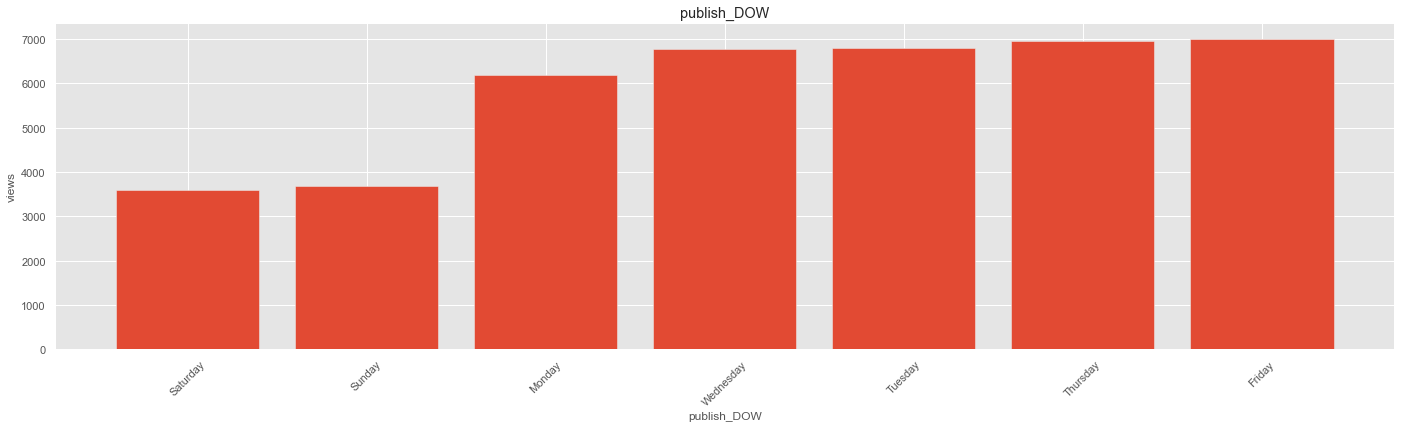

In [41]:
fig,(ax) = plt.subplots(1, figsize=(24, 6)) 
ax = plt.subplot(1, 1, 1)  
ax.bar(df.index, df['views']  )
ax.set(title=f'publish_DOW', ylabel='views', xlabel='publish_DOW')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.show()

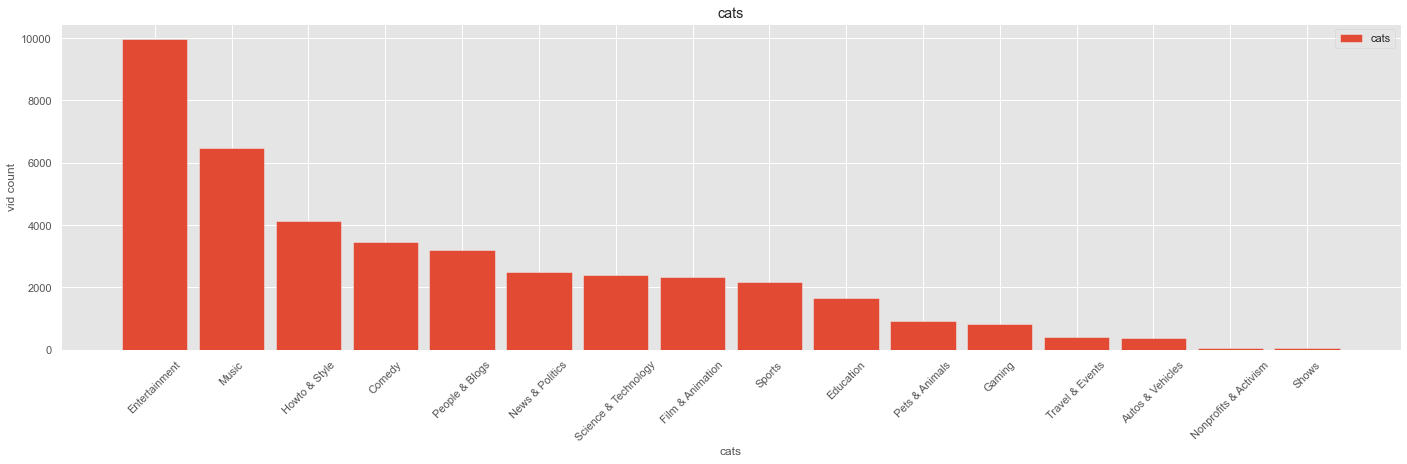

In [42]:
y = df_youtube['snippet.title'].value_counts() 
fig,  (ax) = plt.subplots(1, figsize=(24, 6)) 
ax = plt.subplot(111) 
ax.bar(y.index, y, width=.85 )  
ax.set(title='cats', ylabel='vid count', xlabel='cats')
ax.legend(['cats'] , loc='best') 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.show()

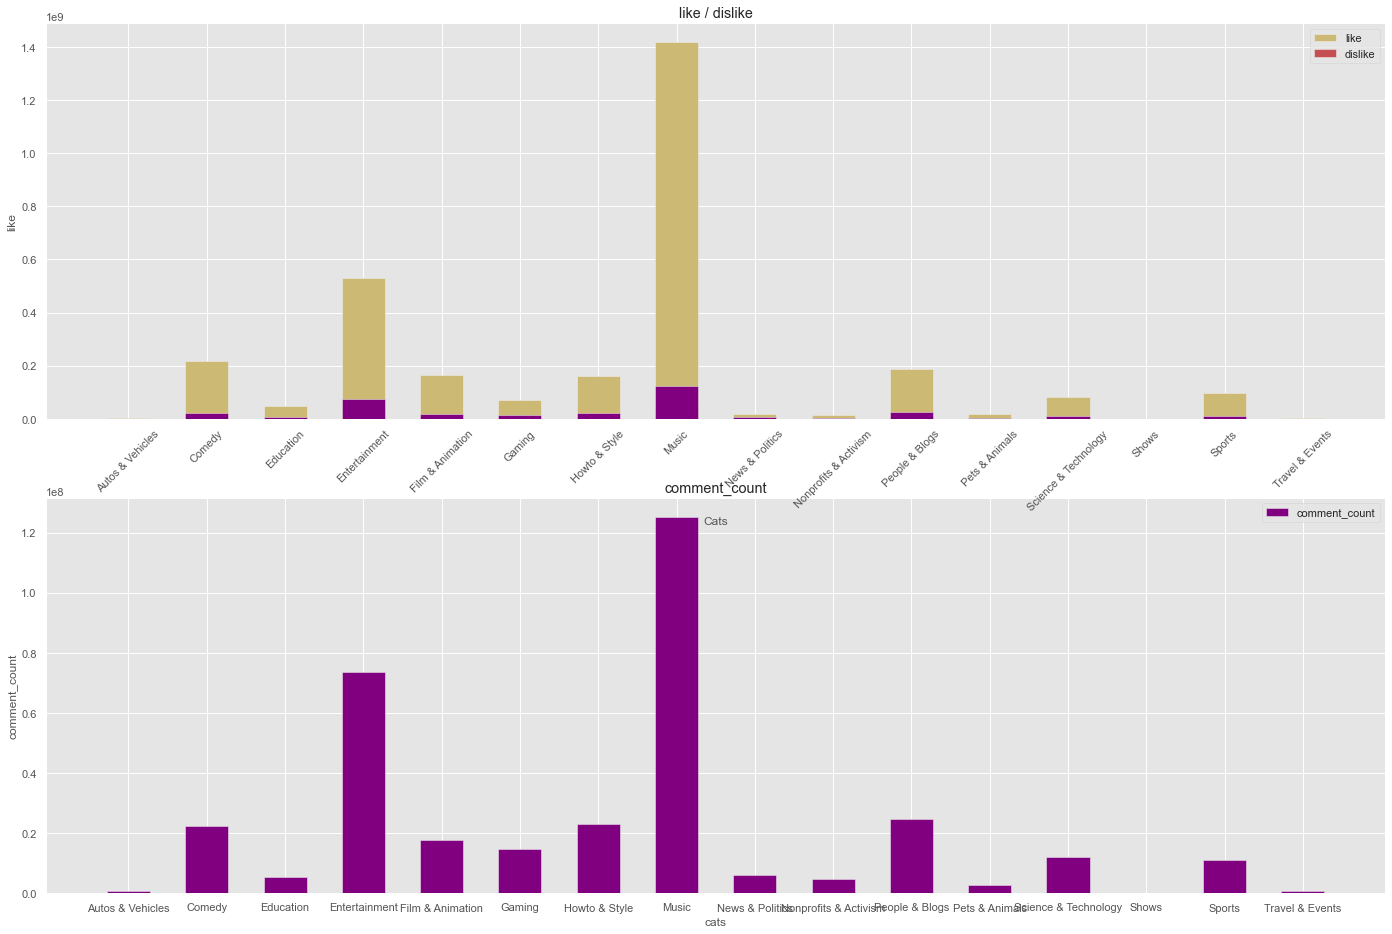

In [45]:
df=df_youtube
df=df[['snippet.title', 'views', 'likes', 'dislikes', 'comment_count']].groupby(df['snippet.title']).sum()
y1=df['likes']
y2=df['dislikes'] 
y3=df['comment_count'] 
fig, (ax, ax1) = plt.subplots(2, figsize=(24,16))
ax = plt.subplot(211) 
ax.bar(y1.index, y1, width=.55, color='y' ) 
ax.bar(y2.index, y2, width=.55, color='r' )    
ax.set(title='like / dislike', ylabel='like', xlabel='Cats')  
ax.legend((['like', 'dislike']) , loc='best') 
ax1.bar(y2.index, y3, width=.55, color='purple' )  
ax1.set(title='comment_count', ylabel='comment_count', xlabel='cats')
ax1.legend(['comment_count'] , loc='best')  
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.show() 

In [44]:

class Main(object):
    def __init__(self):
        self.context = ''
    def tomodel(self, col_names):
        d = {}
        #subprocess.call(["C:\\Users\\Tim\\AppData\\Local\\Programs\\Microsoft VS Code\\Code.exe" ]) 
        for col_name in col_names:  
            key = col_name
            for char in col_name: 
                if not char.isalpha():
                    key = key.replace(char,'')        
            d[key] = col_name.replace('\'','').replace('  ','').strip()
        return d  
    def tonum(num):
        try:
            num=re.sub('\D', '', str(num))
        except:
            print (num)  
        return num.astype(float)
m = Main()
m.tomodel(df_providers.columns)

NameError: name 'df_providers' is not defined

In [ ]:
#df_main= df.rename(columns=lambda x: ''.join([c for c in x if c.isalpha()]), inplace=True)#╭∩╮(Ο_Ο)╭∩╮ 